# Packages and functions

In [1]:
!pip install datasets
!pip install transformers
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 33.9 MB/s 
     |████████████████████████████████| 115 kB 73.9 MB/s 
     |████████████████████████████████| 101 kB 13.1 MB/s 
     |████████████████████████████████| 212 kB 71.4 MB/s 
     |████████████████████████████████| 141 kB 66.0 MB/s 
     |████████████████████████████████| 596 kB 64.2 MB/s 
     |████████████████████████████████| 127 kB 56.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 26.2 MB/s 
     |████████████████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from datasets import (load_metric, Dataset, DatasetDict)
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, TextClassificationPipeline)
import torch
torch.manual_seed(0)

In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# Model 0 geolocation

In [7]:
model_path = 'model0_geolocation'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 189700 testing size: 81300
Columns: Index(['Id', 'text', 'date', 'country', 'country_train'], dtype='object')


In [8]:
n_epochs = 1 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "country_train" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠

# Model 1 valid

In [5]:
model_path = 'model1_valid'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 2170 testing size: 930
Columns: Index(['Id', 'date', 'text_es', 'valid', 'tone', 'referred_to',
       'text_es_clean'],
      dtype='object')


In [6]:
n_epochs = 10 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text_es_clean"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "valid" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
train['valid'] = train['valid'].astype(str)
test['valid'] = test['valid'].astype(str)

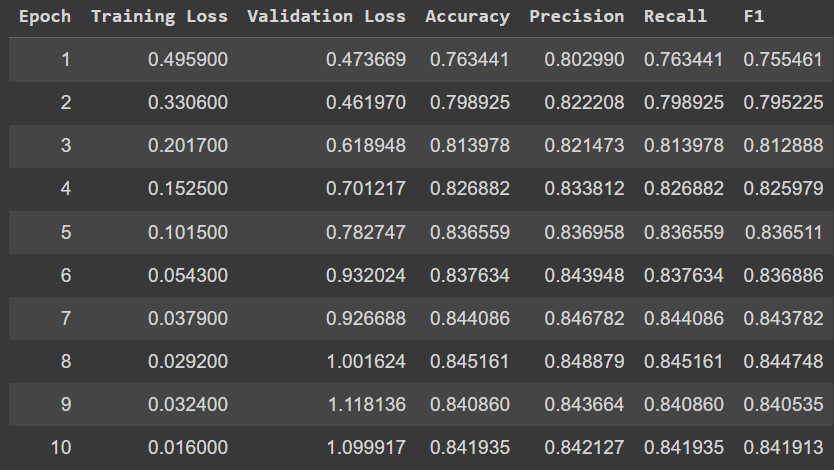

# Model 2 subject



In [7]:
model_path = 'model2_subject'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 824 testing size: 356
Columns: Index(['Id', 'date', 'text_es', 'valid', 'tone', 'referred_to',
       'text_es_clean'],
      dtype='object')


In [9]:
n_epochs = 20 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text_es_clean"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "referred_to" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠

# Model 3 tone

In [29]:
model_path = 'model3_tone'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 1344 testing size: 576
Columns: Index(['Id', 'date', 'text_es', 'valid', 'tone', 'referred_to',
       'text_es_clean', 'text_tone'],
      dtype='object')


In [31]:
n_epochs = 10 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text_es_clean"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "text_tone" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠

# Model 4 negativeness

In [5]:
model_path = 'model4_negativeness'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 441 testing size: 189
Columns: Index(['Id', 'date', 'text_es', 'valid', 'tone', 'referred_to',
       'text_es_clean'],
      dtype='object')


In [6]:
n_epochs = 20 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text_es_clean"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "tone" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
train[cat_column_name] = train[cat_column_name].astype(str)
test[cat_column_name] = test[cat_column_name].astype(str)

# Model 5 positiveness

In [29]:
model_path = 'model5_positiveness'
train = pd.read_excel(model_path+'/train.xlsx')
test = pd.read_excel(model_path+'/test.xlsx')
print("Training size:",len(train),"testing size:", len(test)) 
print("Columns:", train.columns)

Training size: 90 testing size: 42
Columns: Index(['Id', 'date', 'text_es', 'valid', 'tone', 'referred_to',
       'text_es_clean', 'pos_tone'],
      dtype='object')


In [30]:
n_epochs = 30 #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
text_column_name = "text_es_clean"  #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
cat_column_name = "pos_tone" #⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
train[cat_column_name] = train[cat_column_name].astype(str)
test[cat_column_name] = test[cat_column_name].astype(str)

# Running

In [9]:
torch.cuda.empty_cache()

In [10]:
out_dir = model_path+'/bert_multi' 
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

In [11]:
cats = train[cat_column_name].unique()
n_labels = len(cats)
label2id = {}
id2label = {}
for i in range(len(cats)):
  label2id[cats[i]] = i
  id2label[i] = cats[i]

train = train.rename(columns={text_column_name: 'text', cat_column_name: 'label'})
test = test.rename(columns={text_column_name: 'text', cat_column_name: 'label'})
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train['label'] = train['label'].map(label2id)
test['label'] = test['label'].map(label2id)

In [12]:
train = train[['text', 'label']]
test = test[['text', 'label']]

In [13]:
train['text'] = train['text'].astype(str)
test['text'] = test['text'].astype(str)

In [14]:
train_dataset = Dataset.from_dict(train)
test_dataset = Dataset.from_dict(test)
my_dataset_dict = DatasetDict({"train":train_dataset,"test":test_dataset})

In [15]:
tokenizer = AutoTokenizer.from_pretrained(model_name, id2label = id2label, label2id = label2id)

In [16]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)

  0%|          | 0/190 [00:00<?, ?ba/s]

  0%|          | 0/82 [00:00<?, ?ba/s]

In [17]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=0) 
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=0) 

In [18]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, id2label = id2label, label2id = label2id,
                                                           num_labels=n_labels, ignore_mismatched_sizes=True) 
training_args = TrainingArguments(output_dir=out_dir)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric1 = load_metric("accuracy")
    accuracy = metric1.compute(predictions=predictions, references=labels)["accuracy"]
    if n_labels == 2:
      metric2 = load_metric("precision")
      metric3 = load_metric("recall")
      metric4 = load_metric("f1")
      precision = metric2.compute(predictions=predictions, references=labels, average = 'macro')["precision"]
      recall = metric3.compute(predictions=predictions, references=labels, average = 'macro')["recall"]
      f1 = metric4.compute(predictions=predictions, references=labels, average = 'macro')["f1"]
      return {"accuracy":accuracy, "precision": precision, "recall": recall, "f1":f1}
    elif n_labels > 2:
      return {"accuracy":accuracy}

In [20]:
training_args = TrainingArguments(output_dir=out_dir, evaluation_strategy="epoch",
                                  save_strategy = "steps", save_total_limit = 1, logging_strategy = "epoch",
                                  seed = 0, num_train_epochs = n_epochs,
                                  auto_find_batch_size = True, resume_from_checkpoint=out_dir)

In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [22]:
for batch in trainer.get_train_dataloader():
    break

outputs = trainer.model.cpu()(**batch)

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


In [23]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch = {k: v.to(device) for k, v in batch.items()}

outputs = trainer.model.to(device)(**batch)

In [24]:
torch.cuda.is_available()

True

In [25]:
loss = outputs.loss
loss.backward()

In [26]:
trainer.create_optimizer()
trainer.optimizer.step()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Training

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/accelerate/memory_utils.py:26: FutureWarning: memory_utils has been reorganized to utils.memory. Import `find_executable_batchsize` from the main `__init__`: `from accelerate import find_executable_batch_size` to avoid this warning.
  FutureWarning,
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 189700
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 23713


Epoch,Training Loss,Validation Loss


Saving model checkpoint to model0_geolocation/bert_multi/checkpoint-500
Configuration saved in model0_geolocation/bert_multi/checkpoint-500/config.json
Model weights saved in model0_geolocation/bert_multi/checkpoint-500/pytorch_model.bin
Saving model checkpoint to model0_geolocation/bert_multi/checkpoint-1000
Configuration saved in model0_geolocation/bert_multi/checkpoint-1000/config.json
Model weights saved in model0_geolocation/bert_multi/checkpoint-1000/pytorch_model.bin
Deleting older checkpoint [model0_geolocation/bert_multi/checkpoint-500] due to args.save_total_limit
Saving model checkpoint to model0_geolocation/bert_multi/checkpoint-1500
Configuration saved in model0_geolocation/bert_multi/checkpoint-1500/config.json
Model weights saved in model0_geolocation/bert_multi/checkpoint-1500/pytorch_model.bin
Deleting older checkpoint [model0_geolocation/bert_multi/checkpoint-1000] due to args.save_total_limit
Saving model checkpoint to model0_geolocation/bert_multi/checkpoint-2000
Co

In [ ]:
trainer.save_model()

In [ ]:
trainer.evaluate()

In [ ]:
trainer.save_metrics('all',trainer.evaluate())